# Factory methods

Factory methods are the primary way of creating useful geometries fast. They form an abstraction level up from knot vectors and control-points to give a cleaner simpler interface. The factory methods need to be imported.

In [1]:
import splipy as sp
import numpy as np

import splipy.curve_factory   as curve_factory
import splipy.surface_factory as surface_factory
import splipy.volume_factory  as volume_factory

In addition to the splipy libraries, we will include matplotlib to use as our plotting tool. For convenience, we will create a few plotting functions, which will make the rest of the code that much shorter. The details on the plotting commands are of secondary nature as it mostly rely on matplotlib-specific things. For a more comprehensive introduction into these functions, consider reading [Matplotlib for 3D](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#d-plots-in-3d) or [Pyplot (2D)](https://matplotlib.org/api/pyplot_api.html).

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_2D_curve(curve, show_controlpoints=False):
    t = np.linspace(curve.start(), curve.end(), 150)
    x = curve(t)
    plt.plot(x[:,0], x[:,1])
    if(show_controlpoints):
        plt.plot(curve[:,0], curve[:,1], 'rs-')
    plt.axis('equal')
    plt.show()
    
def plot_2D_surface(surface):
    u = np.linspace(surface.start('u'), surface.end('u'), 30)
    v = np.linspace(surface.start('v'), surface.end('v'), 30)
    x = surface(u,v)
    plt.plot(x[:,:,0],   x[:,:,1],   'k-')
    plt.plot(x[:,:,0].T, x[:,:,1].T, 'k-')
    plt.axis('equal')
    plt.show()

def plot_3D_curve(curve):
    t = np.linspace(curve.start(), curve.end(), 150)
    x = curve(t)
    fig = plt.gcf()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x[:,0], x[:,1], x[:,2])
    plt.show()
    
def plot_3D_surface(surface):
    u = np.linspace(surface.start('u'), surface.end('u'), 30)
    v = np.linspace(surface.start('v'), surface.end('v'), 30)
    x = surface(u,v)
    fig = plt.gcf()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(  x[:,:,0], x[:,:,1], x[:,:,2])
    ax.plot_wireframe(x[:,:,0], x[:,:,1], x[:,:,2], edgecolor='k', linewidth=1)
    plt.show()

def plot_3D_volumes(volume):
    fig = plt.gcf()
    ax = fig.add_subplot(111, projection='3d')
    for face in volume.edges():
        u = np.linspace(face.start('u'), face.end('u'), 30)
        v = np.linspace(face.start('v'), face.end('v'), 30)
        x = face(u,v)
        ax.plot_surface(  x[:,:,0], x[:,:,1], x[:,:,2])
        ax.plot_wireframe(x[:,:,0], x[:,:,1], x[:,:,2], edgecolor='k', linewidth=1)
    plt.show()
    


## Curves

The traditional construction technique is to start bottoms up and create curves. Surfaces are then created by the manipulation of curves, and finally volumes from the manipulation of surfaces.

### Lines and polygons

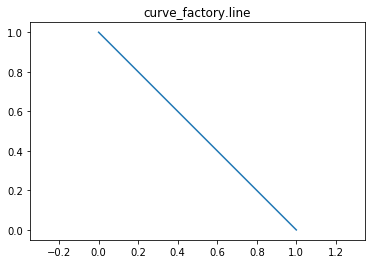

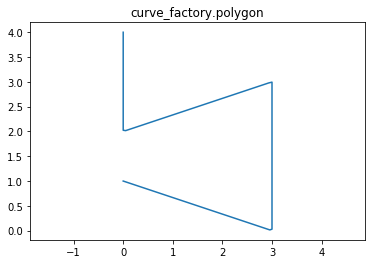

In [3]:
line = curve_factory.line([0,1], [1,0])
plt.title('curve_factory.line')
plot_2D_curve(line)

line_segment = curve_factory.polygon([0,1], [3,0], [3,3], [0,2], [0,4])
plt.title('curve_factory.polygon')
plot_2D_curve(line_segment)

### Circles and Circle segments

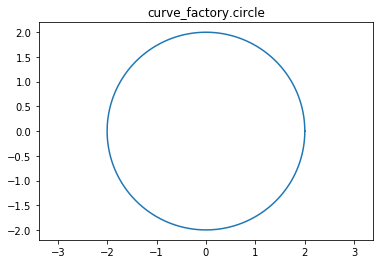

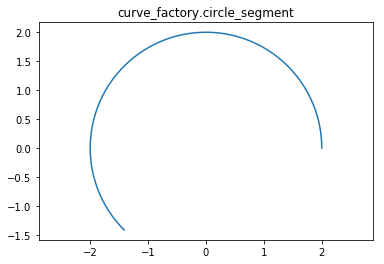

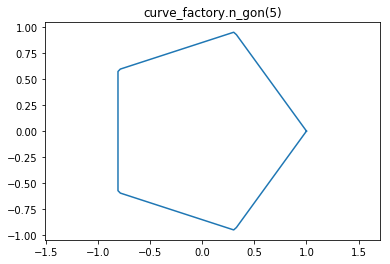

In [4]:
circle = curve_factory.circle(r=2.0)
plt.title('curve_factory.circle')
plot_2D_curve(circle)

circle_seg = curve_factory.circle_segment(theta=5*np.pi/4, r=2.0)
plt.title('curve_factory.circle_segment')
plot_2D_curve(circle_seg)

ngon = curve_factory.n_gon(5)
plt.title('curve_factory.n_gon(5)')
plot_2D_curve(ngon)

### Bezier curves

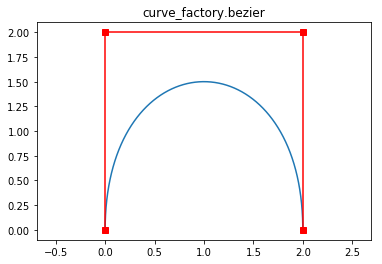

In [5]:
bezier = curve_factory.bezier([[0,0], [0,2], [2,2], [2,0]])
plt.title('curve_factory.bezier')
plot_2D_curve(bezier, show_controlpoints=True)

### Cubic Spline Interpolation

Assume we are given a set of points that we want to fit a curve to. This set can either be a measured set of points, or one given from a parametrized curve. For moderatly sized datasets, it is convenient to do curve interpolation on these points

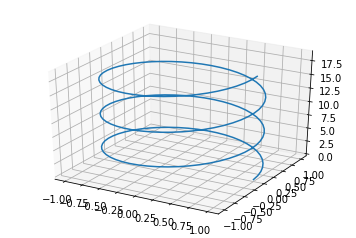

In [6]:
# We will create a B-spline curve approximation of a helix (spiral/spring). 
t = np.linspace(0,6*np.pi, 50) # generate 50 points which we will interpolate
x = np.array([np.cos(t), np.sin(t), t])

curve = curve_factory.cubic_curve(x.T) # transpose input so x[i,:] is one (x,y,z)-interpolation point
plt.title('curve_facfiguretory.cubic_curve')
plot_3D_curve(curve)

**Note** that there exist a multitude of other interpolation algorithms that you can use, for instance Hermite interpolation or general spline interpolation.

### Spline curve approximations 

If the number of points to interpolate grow too large, it is impractical to create a global interpolation problem. For these cases, we may use a least square fit approximation

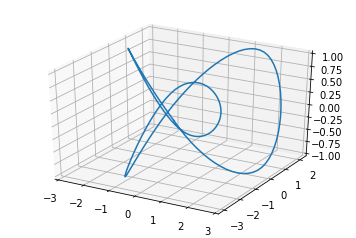

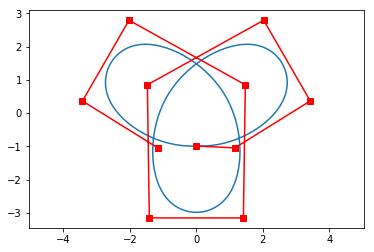

In [7]:
# We will create a B-spline curve approximation of the trefoil knot
t = np.linspace(0,2*np.pi, 5000) # 5000 points is far too many than we need to represent this smooth shape
x = np.array([np.sin(t) + 2*np.sin(2*t), np.cos(t) - 2*np.cos(2*t), -np.sin(3*t)])

# create the basis onto which we will fit our curve
basis = sp.BSplineBasis(4, [-1,0,0,0,1,2,3,4,5,6,7,8,9,9,9,10],0)
t = t/2.0/np.pi * 9  # scale evaluation points so they lie on the parametric space [0,9]

curve = curve_factory.least_square_fit(x.T, basis, t) # transpose input so x[i,:] is one (x,y,z)-interpolation point
plt.title('curve_facfiguretory.least_square_fit')
plot_3D_curve(curve)
plot_2D_curve(curve, show_controlpoints=True)

## Surfaces

### simple 2D shapes

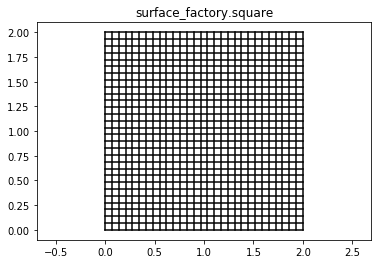

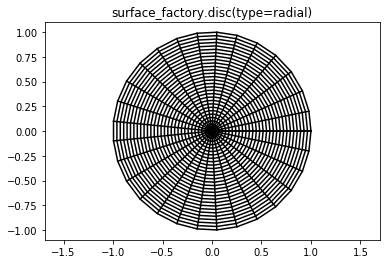

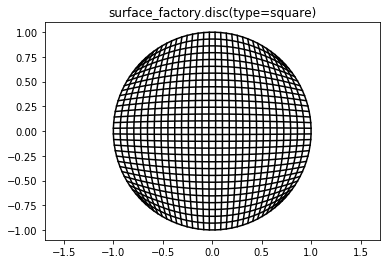

In [8]:
square = surface_factory.square(size=2)
plt.title('surface_factory.square')
plot_2D_surface(square)

disc = surface_factory.disc(type='radial')
plt.title('surface_factory.disc(type=radial)')
plot_2D_surface(disc)

disc = surface_factory.disc(type='square')
plt.title('surface_factory.disc(type=square)')
plot_2D_surface(disc)

### Sphere

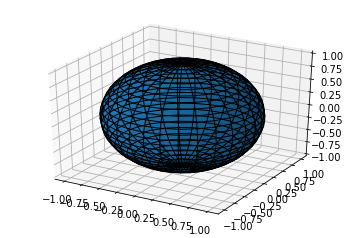

In [9]:
sphere = surface_factory.sphere()
plt.title('surface_factory.sphere')
plot_3D_surface(sphere)

### Torus

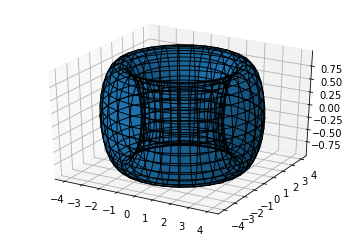

In [10]:
torus = surface_factory.torus()
plt.title('surface_factory.torus')
plot_3D_surface(torus)

### Cylinder

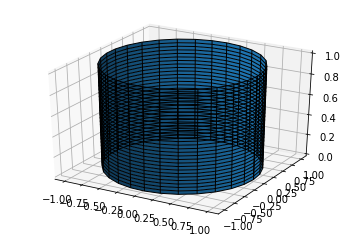

In [11]:
cylinder = surface_factory.cylinder()
plt.figure()
plt.title('surface_factory.cylinder')
plot_3D_surface(cylinder)